# Units of sigma vs probabilities
#### by Elizabeth Barnes

Ok - let's setup our python environment.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

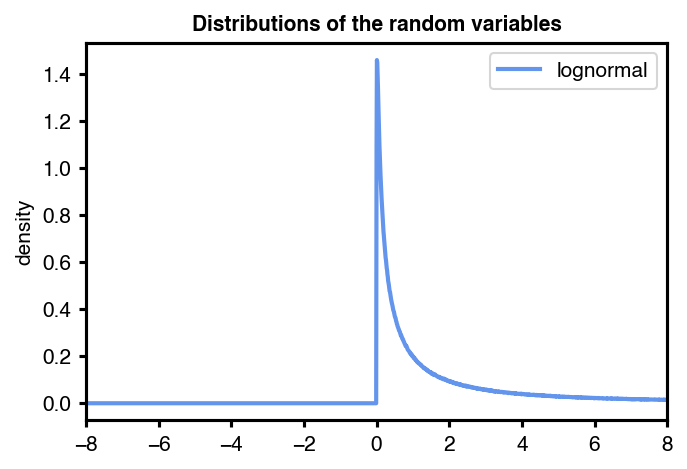

In [2]:
N0 = 10000000
xinc = 0.01
xbins = np.arange(-10,10,xinc)

Rlog = np.random.lognormal(0.,2.,size=(N0,))

cgf.cfig(1)

hx = np.histogram(Rlog,xbins)
plt.plot(hx[1][:-1],hx[0]/(float(N0)*xinc),'-',color='cornflowerblue', label='lognormal')

plt.legend()
plt.ylabel('density')
plt.xlim(-8,8)
plt.title('Distributions of the random variables')

plt.show()

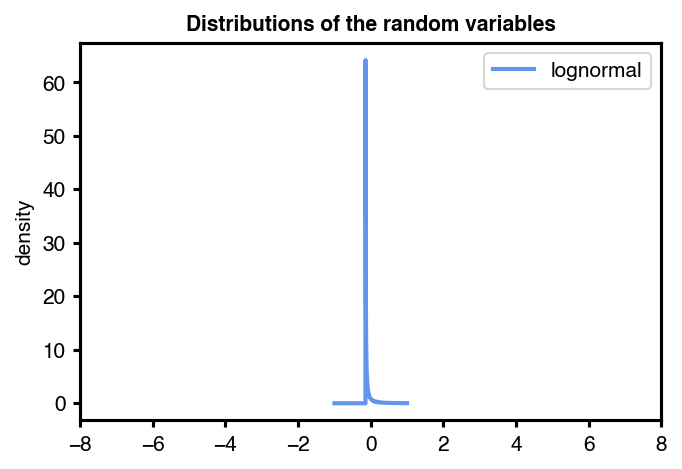

In [5]:
Rlog_standardized = (Rlog - np.mean(Rlog))/np.std(Rlog)

xinc = 0.001
xbins = np.arange(-1,1,xinc)

cgf.cfig(2)

hx = np.histogram(Rlog_standardized,xbins)
plt.plot(hx[1][:-1],hx[0]/(float(N0)*xinc),'-',color='cornflowerblue', label='lognormal')

plt.legend()
plt.ylabel('density')
plt.xlim(-8,8)
plt.title('Distributions of the random variables')

plt.show()

Now, we can draw samples of various lengths (which we once again call $N$) from each of these distributions, take the means of these samples, and plot the distributions of the means. The **Central Limit Theorem** tells us that as $N$ gets bigger all of the distributions of means will start looking like Gaussians - even if the underlying distributions from which we draw the samples are not Gaussian! Let's try it out.

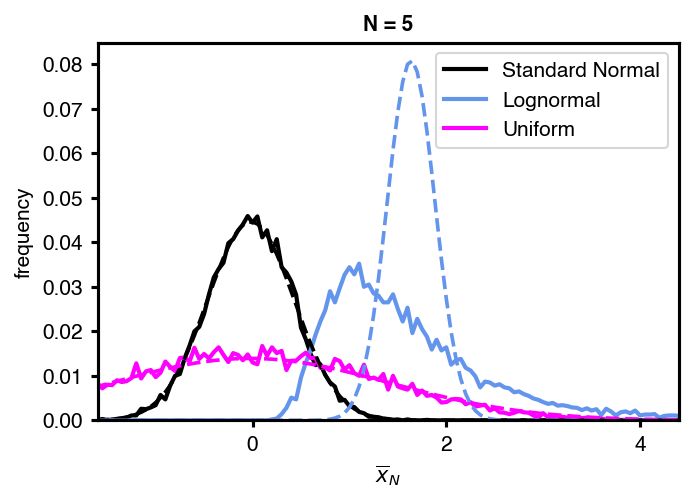

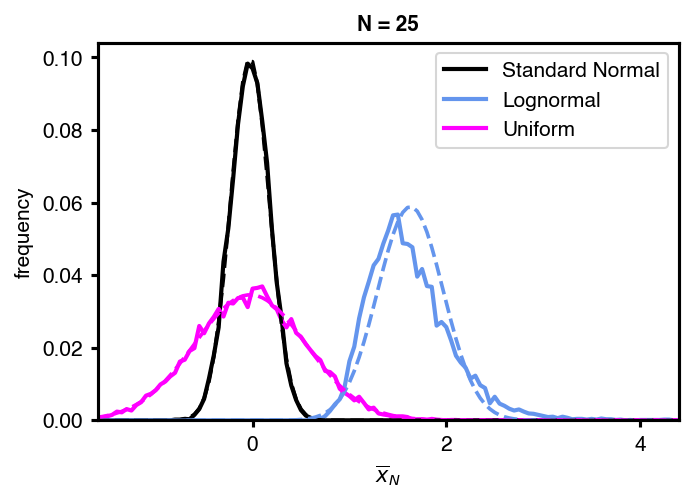

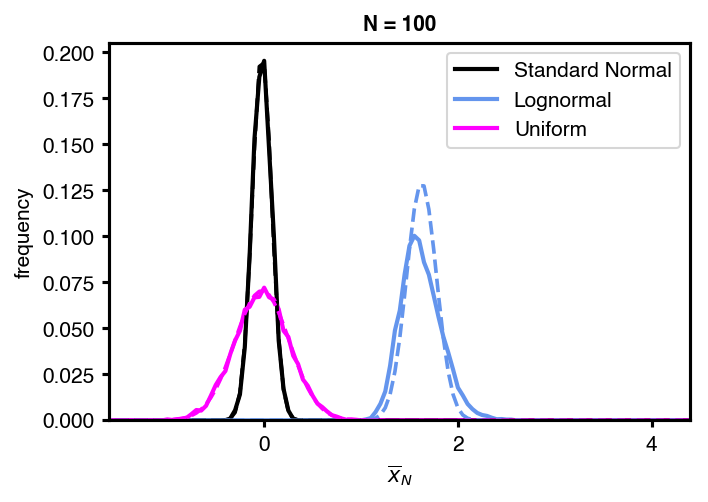

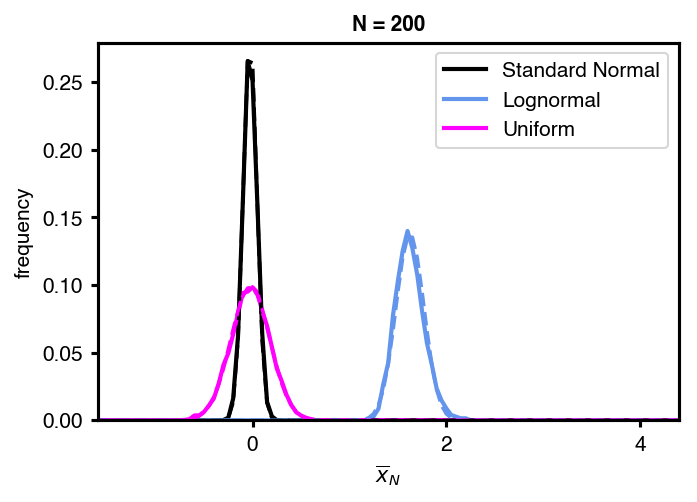

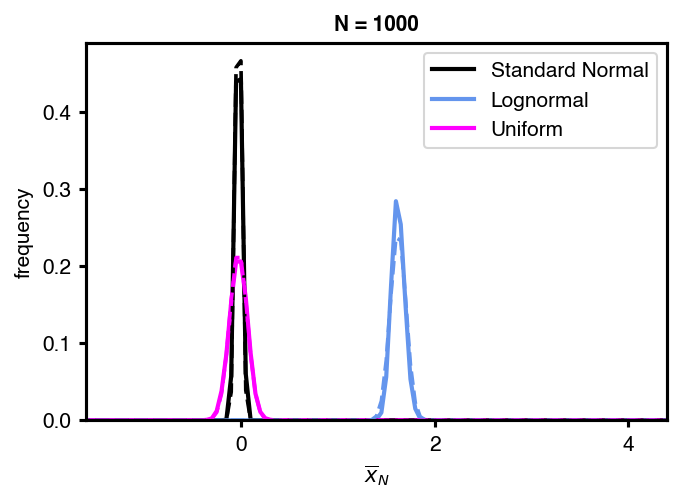

In [15]:
for N in (5, 25, 100, 200, 1000):

    y1, y2, y3, y4 = [], [], [], []
    
    for i in np.arange(0,10000):
    
        y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))    
        y1.append(np.mean(np.random.chisquare(3., size = N)))
        y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))
        y4.append(np.mean(np.random.uniform(low = -5, high = 5, size = N)))
    
    
    sigma_y1 = np.std(np.random.chisquare(3., size = N))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = N))
    sigma_y4 = np.std(np.random.uniform(low = -5, high = 5, size = N))
    
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y1hist, x = np.histogram(y1,bins = bins)
    y2hist, x = np.histogram(y2,bins = bins)
    y3hist, x = np.histogram(y3,bins = bins)
    y4hist, x = np.histogram(y4,bins = bins)
    
    x = bins[0:-1]
    
    cgf.cfig(1)
    
    plt.plot(x,y2hist/(float(len(y2))), color = 'black', label = 'Standard Normal')
    plt.plot(x,y3hist/(float(len(y3))),  color = 'cornflowerblue', label = 'Lognormal')
    plt.plot(x,y4hist/(float(len(y4))), color = 'magenta', label = 'Uniform')
    
    if(N>=0):
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y2), scale = 1./np.sqrt(N)), 
                 color = 'black', linestyle = '--', linewidth = 1.75)
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), 
                 color = 'cornflowerblue', linestyle = '--', linewidth = 1.75)
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y4), scale = sigma_y4/np.sqrt(N)), 
                 color = 'magenta', linestyle = '--', linewidth = 1.75)    
    
    plt.xticks(np.arange(-10,10,2))
    plt.xlim(-1.6,4.4)
    ymin, ymax = plt.gca().get_ylim()
    plt.ylim(0,ymax)

    textprint = r'$\overline{x}_{N}$'
    plt.xlabel(textprint)
    plt.ylabel('frequency')
    
    plt.title('N = ' + str(N))
    plt.legend()
       
    plt.show()

As you can see, the theoretical prediction (the dashed lines) converge to the actual distributions (solid lines) as $N$ increases. For really small $N$, only the normal random variable looks even close to its theoretical prediction (again - we actually need the $t$-statistic here, but the prediction is still okay). Thus, as the **Central Limit Theorem** states, convergence requires $N$ to be _big enough_, and the definition of _big enough_ depends on the underlying distribution of the random variable. It is up to you to figure out how big _big enough_ is for your data.